<a href="https://colab.research.google.com/github/Madhuraaa22/PRODIGY_DS_04/blob/main/Prodigy_DS_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-2326581431.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


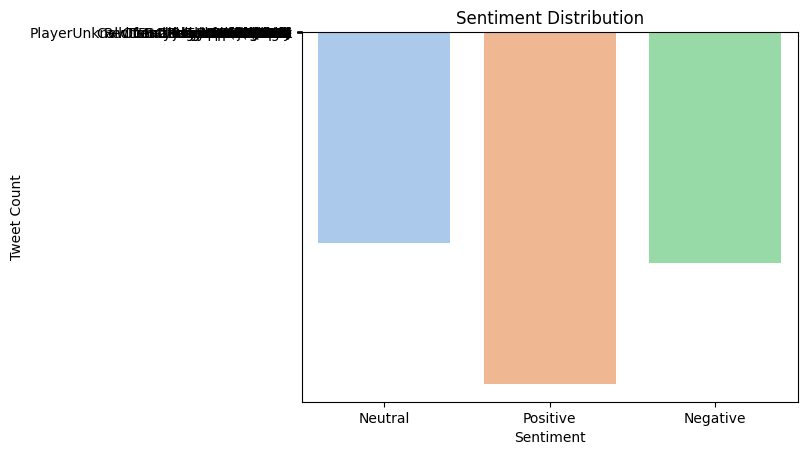

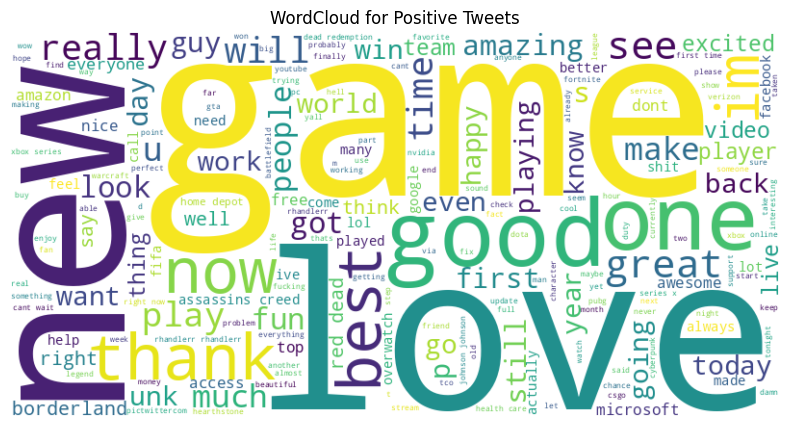

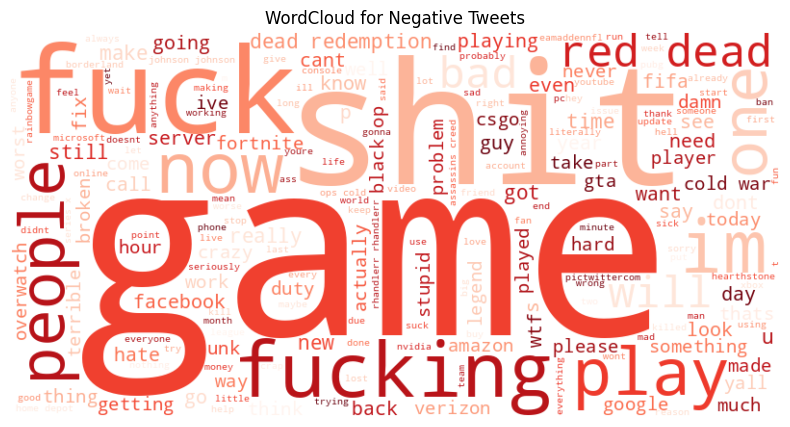

In [ ]:
# Step 1: Install required libraries
!pip install pandas matplotlib seaborn nltk wordcloud textblob --quiet

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 3: Load Dataset
df = pd.read_csv("/content/twitter_training.csv", header=None) # Add header=None as the dataset does not have a header row

# Rename column if required
# Based on the df.head() output, the column containing the tweet text is the last one (index 3)
df.rename(columns={3: 'tweet'}, inplace=True)
df.head()

# Clean tweet text
def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))         # remove links
    text = re.sub(r"@\w+", "", text)                  # remove mentions
    text = re.sub(r"#\w+", "", text)                  # remove hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)           # remove special chars
    text = text.lower()                               # lowercase
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)
df[['tweet', 'clean_tweet']].head()
# Calculate sentiment scores using TextBlob
df['polarity'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Classify polarity into sentiment category
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(get_sentiment)
df[['clean_tweet', 'polarity', 'subjectivity', 'sentiment']].head()

sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

positive_tweets = ' '.join(df[df['sentiment'] == 'Positive']['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Positive Tweets")
plt.show()

negative_tweets = ' '.join(df[df['sentiment'] == 'Negative']['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Negative Tweets")
plt.show()

# Save to CSV for further use or reporting
df.to_csv("sentiment_analysis_results.csv", index=False)

In [ ]:
from google.colab import files
files.download("sentiment_analysis_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>